In [2]:
pip install ../../

Processing /home/mehdi/Straph
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for straph: filename=straph-0.3-py3-none-any.whl size=123882 sha256=5e1b5598b14ca3439853972b79067bc2e31e2f0fe645cbf4a6bd19809a467bf6
  Stored in directory: /tmp/pip-ephem-wheel-cache-7drqj_41/wheels/b5/a9/15/900863b02cb736e4f08449e03d1d2d6ad447e06de70afc5fed
Successfully built straph
  Attempting uninstall: straph
    Found existing installation: straph 0.3
    Uninstalling straph-0.3:
      Successfully uninstalled straph-0.3
You should consider upgrading via the '/home/mehdi/sage_github/sage/bin/python3 -m pip install --upgrade pip' command.
Note: yo

In [1]:
nb_erdos = 9

In [2]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,20)
import straph as sg
import straph.betweenness as bt
import straph.betweenness.volumes as vol
path_directory = "examples/"
S = sg.read_stream_graph(path_nodes=path_directory + "erdos"+str(nb_erdos)+"_nodes.sg",
                      path_links=path_directory + "erdos"+ str(nb_erdos)+ "_links.sg")
S.describe()

Nb of Nodes :  12
Nb of segmented nodes :  12.0
Nb of links :  46
Nb of segmented links :  80.0
Nb of event times :  64


In [3]:
bt.to_undirected(S)

<AxesSubplot:xlabel='t', ylabel='Nodes'>

findfont: Font family ['Garamond'] not found. Falling back to DejaVu Sans.


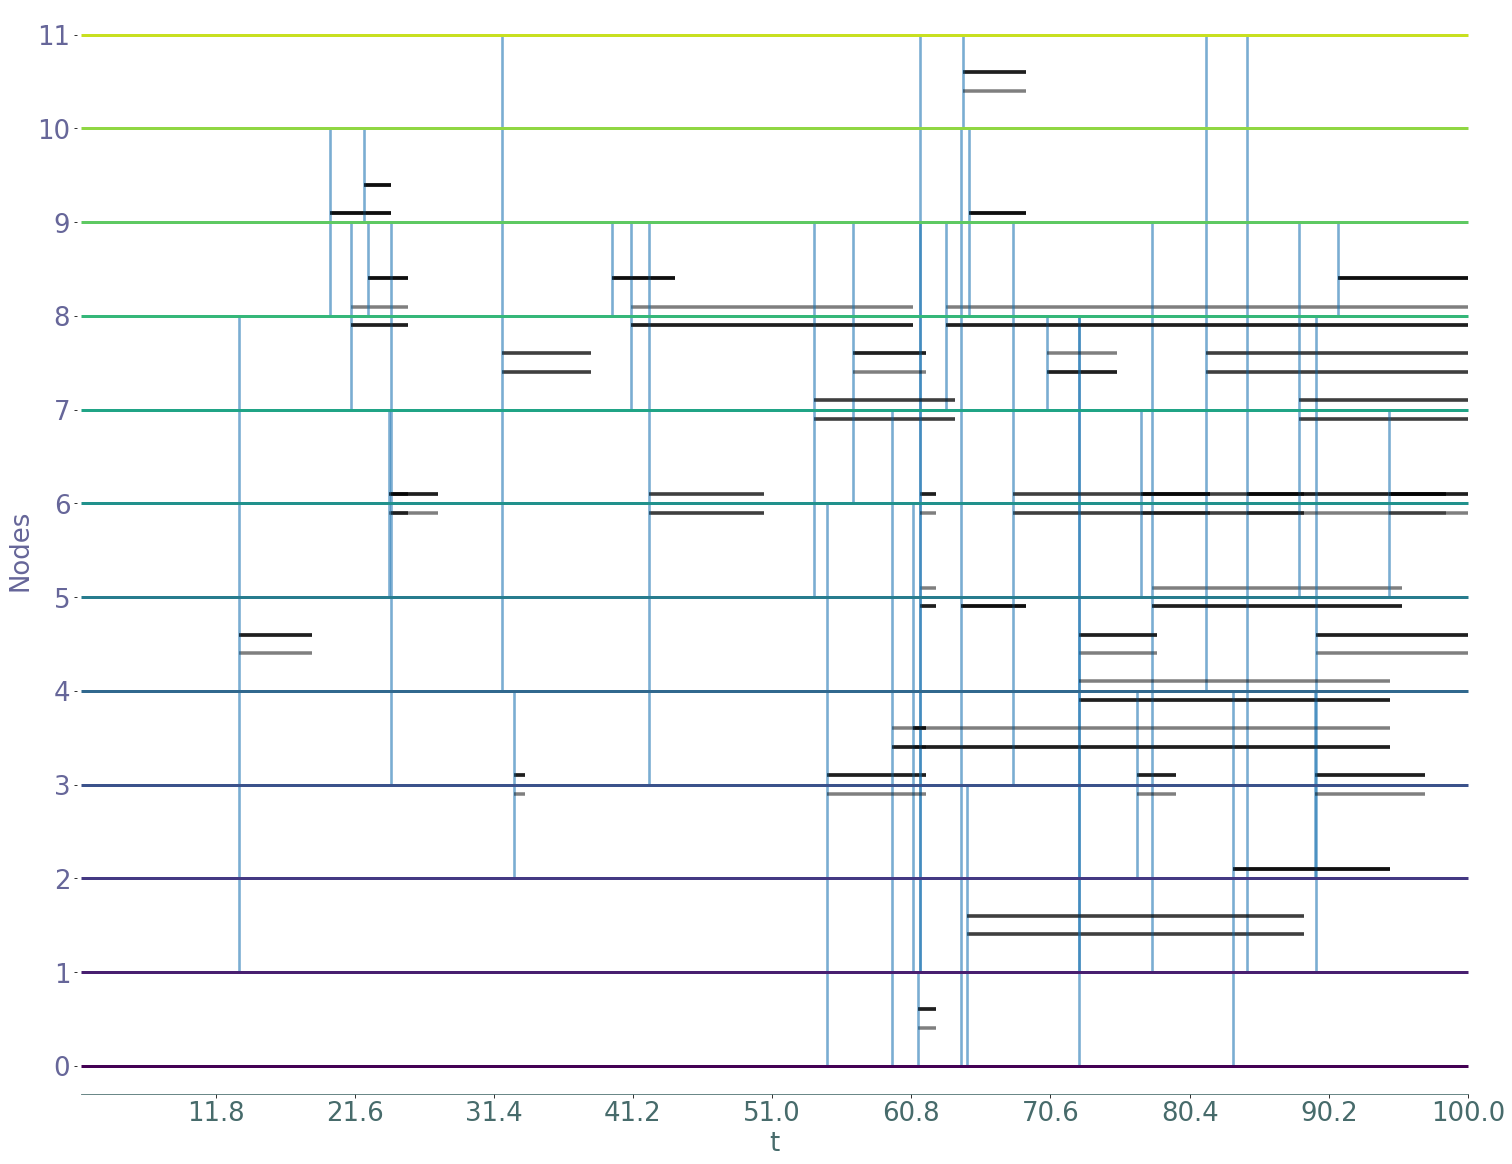

In [4]:
S.plot()

In [5]:
#for i in range(0,2*int(max(list(S.event_times())))):
#    S.add_point(i/2)
S.sg_to_streamfig("stream_example","eps")
nouveau = S.fragmented_stream_graph()

In [6]:
#nouveau.plot()
#plt.savefig("link_s_con.png",dpi=300,bbox_inches ='tight' )

In [7]:
events, events_reverse = bt.events_dic(nouveau)

In [8]:
link_ind = bt.link_index(nouveau)
neighbors, neighbors_inv = bt.neighbors_direct(nouveau)
unt = bt.until(nouveau, events, events_reverse)

In [9]:
node = 2

In [10]:
pre, cur_best = bt.dijkstra_directed(nouveau, node, events, events_reverse, neighbors, link_ind, neighbors_inv, unt)
cur_b_arr = bt. cur_best_to_array(nouveau, cur_best, events, events_reverse)

In [11]:
cur_best[5]

{2.359059416331988: (-inf, inf),
 13.455672503002031: (-inf, inf),
 18.579993255160478: (-inf, inf),
 19.878426137056497: (-inf, inf),
 21.31293018103355: (-inf, inf),
 22.278091723238155: (-inf, inf),
 22.52581331493392: (-inf, inf),
 24.02708578529516: (-inf, inf),
 24.1320941641333: (-inf, inf),
 24.192830891936: (-inf, inf),
 25.327848244670754: (-inf, inf),
 27.480982722876274: (-inf, inf),
 31.999687236753932: (-inf, inf),
 32.80437360133133: (-inf, inf),
 33.57149700068622: (-inf, inf),
 38.24357192361394: (-inf, inf),
 39.71262743583119: (-inf, inf),
 41.06847054468504: (-inf, inf),
 42.31388481515437: (-inf, inf),
 44.168890858398306: (-inf, inf),
 50.425124453022434: (-inf, inf),
 53.91499554493517: (-inf, inf),
 54.87746515065513: (-inf, inf),
 56.69104208674378: (-inf, inf),
 59.41127040764964: (-inf, inf),
 60.903666402994986: (-inf, inf),
 60.916407967138554: (-inf, inf),
 61.23866173149713: (-inf, inf),
 61.39093478686634: (-inf, inf),
 61.421135855314596: (33.5714970006

In [12]:
lat = bt.latencies(nouveau, cur_b_arr, events, events_reverse)
lat_triplet, lat_rev_triplet = bt.latencies_without_0_and_rev(nouveau, lat, events)

In [13]:
lat_triplet[1]

[[33.57149700068622, 61.421135855314596, 3],
 [79.42609013671806, 83.43201144567504, 5],
 [89.25308792404718, 89.25308792404718, 3],
 [89.32121451205022, 89.32121451205022, 3],
 [90.8182145981255, 90.8182145981255, 3],
 [94.45611643044136, 94.45611643044136, 3],
 [94.48906117961505, 94.48906117961505, 3],
 [95.37871915545995, 95.37871915545995, 3],
 [96.97103941556651, 96.97103941556651, 3]]

In [14]:
G = bt.predecessor_graph(nouveau, pre,node)
GG = bt.graph_to_ordered(G, events, events_reverse)
Gp = bt.instant_graphs(G)
GT = bt.interval_graph(Gp)

lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol
lol


In [15]:
for e in Gp:
    print(e)

(31.999687236753932, 32.80437360133133)
(32.80437360133133, 33.57149700068622)
(61.39093478686634, 61.421135855314596)
(64.70053005485087, 64.8967631130064)
(64.8967631130064, 67.92667403302652)
(67.92667403302652, 68.88539079083769)
(68.88539079083769, 70.36273928961235)
(70.36273928961235, 72.59343557165808)
(72.59343557165808, 72.63331316970945)
(72.63331316970945, 75.2753541877253)
(75.2753541877253, 76.66468557090026)
(76.66468557090026, 76.99328472475085)
(76.99328472475085, 77.7317161272031)
(77.7317161272031, 78.13441189433178)
(78.13441189433178, 79.42609013671806)
(79.42609013671806, 81.584398652186)
(81.584398652186, 81.83786850826748)
(61.421135855314596, 61.86949408259534)
(61.86949408259534, 62.513125590706636)
(62.513125590706636, 63.27663921740965)
(63.27663921740965, 63.8994770662073)
(63.8994770662073, 64.27905042707731)
(64.27905042707731, 64.40748199012464)
(64.40748199012464, 64.70053005485087)
(33.57149700068622, 38.24357192361394)
(81.83786850826748, 83.432011445

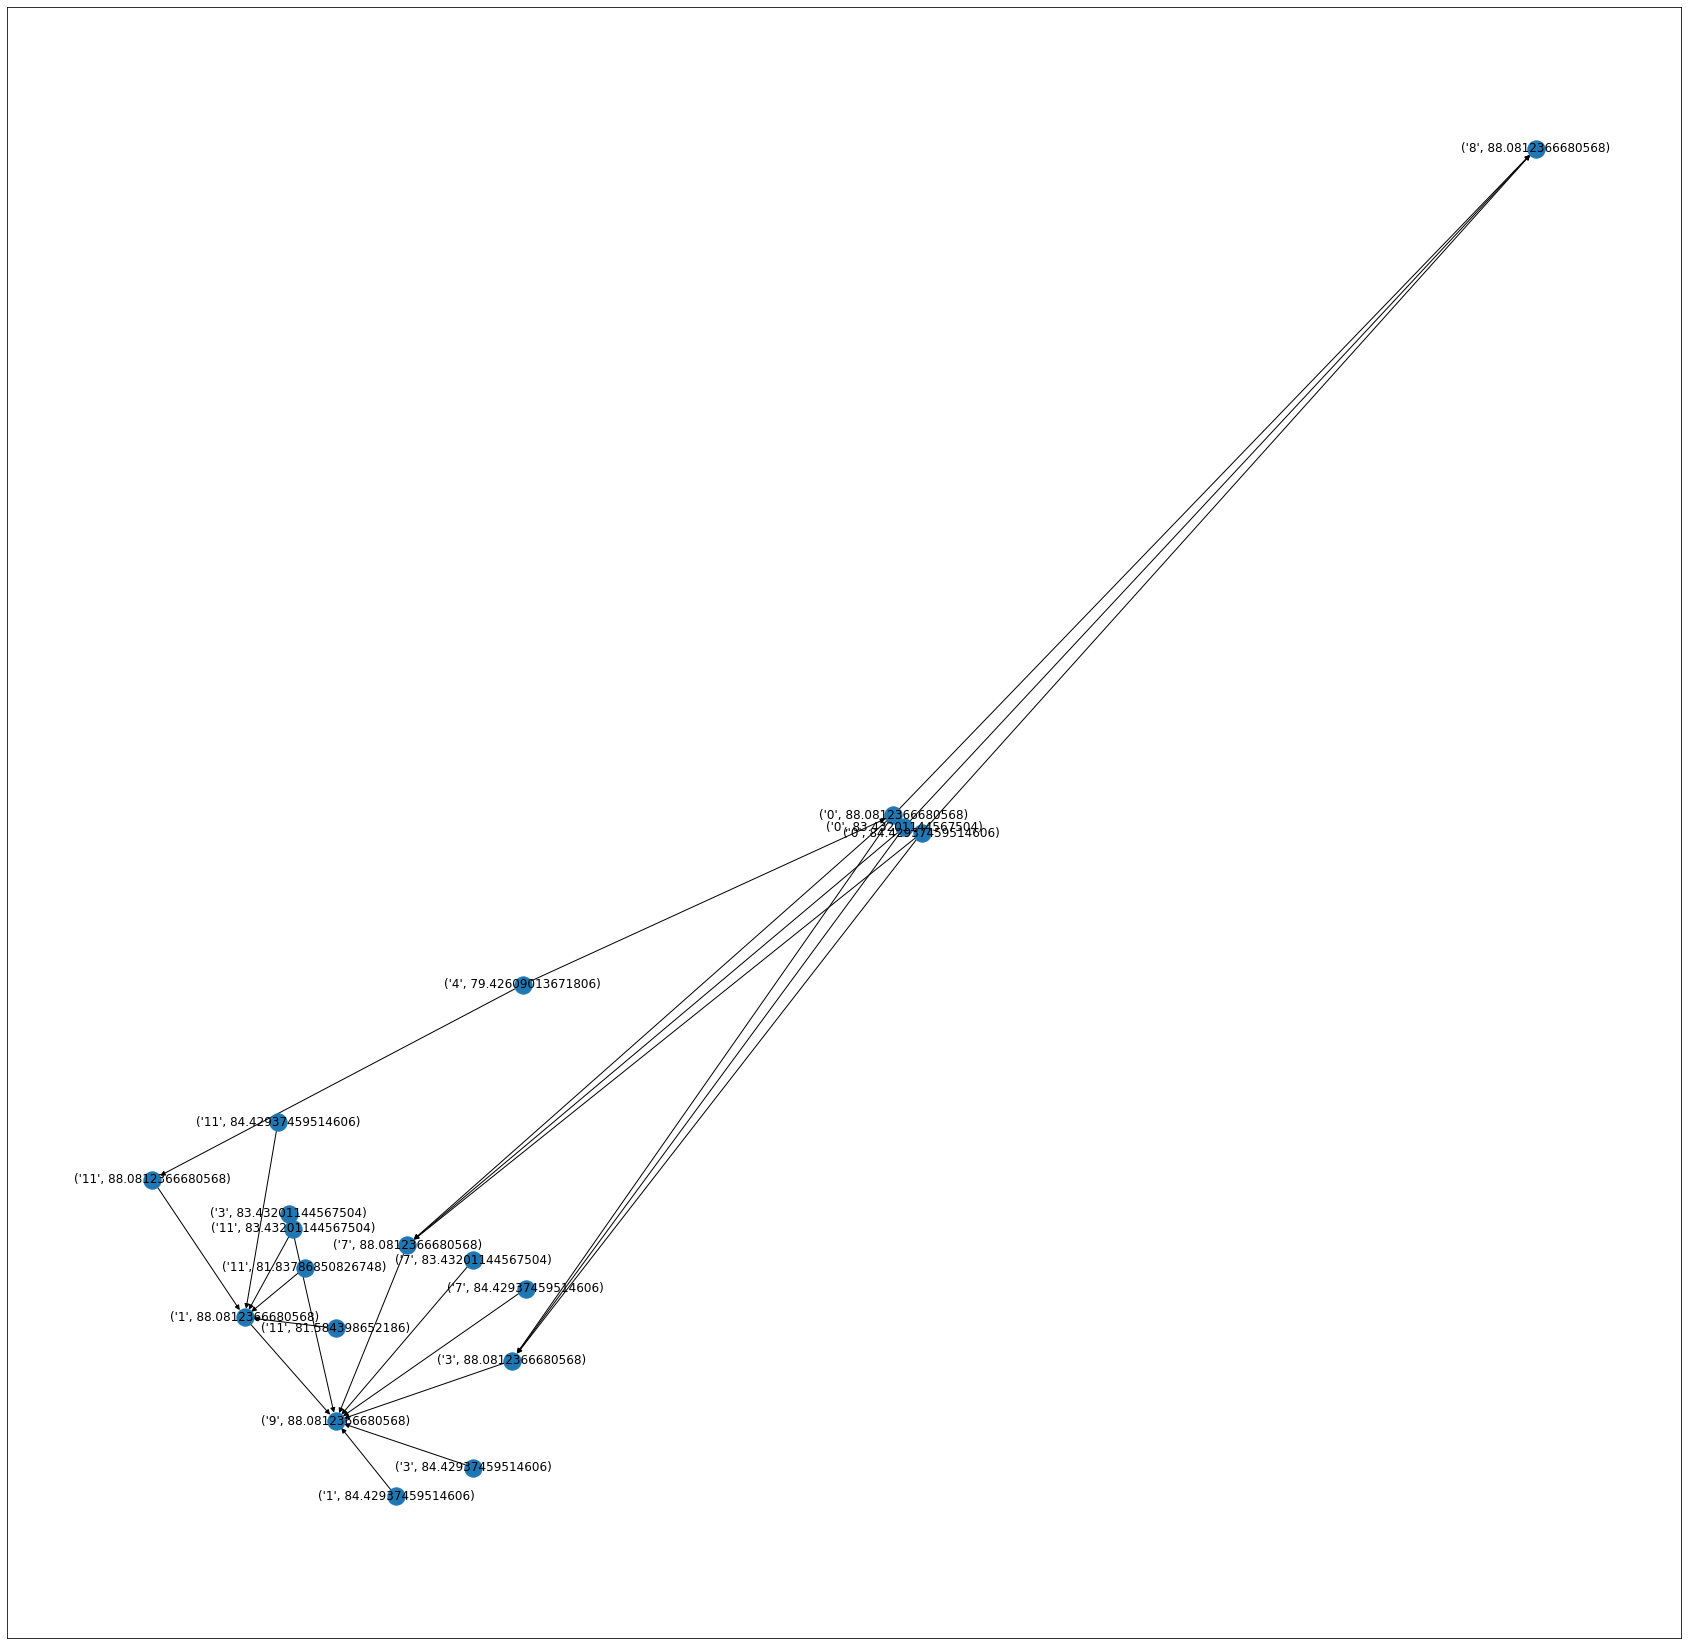

In [16]:
import networkx as nx
GD = Gp[(84.42937459514606, 88.0812366680568)].graph
ren = dict()
for e in GD.nodes:
    ren[e] = (nouveau.node_to_label[e[0]],e[1])
#print(ren)
GN =  nx.relabel_nodes(GD, ren, copy=True)
fig, ax = plt.subplots(figsize=(30,30))
nx.draw_networkx(GN,arrows=True,width = 1,ax = ax)

In [17]:
import networkx as nx
for path in nx.all_simple_paths(Gp[(84.42937459514606, 88.0812366680568)].graph, source=(0, 88.0812366680568), target = (9, 88.0812366680568)):
    print(path)

[(0, 88.0812366680568), (3, 88.0812366680568), (9, 88.0812366680568)]
[(0, 88.0812366680568), (7, 88.0812366680568), (9, 88.0812366680568)]


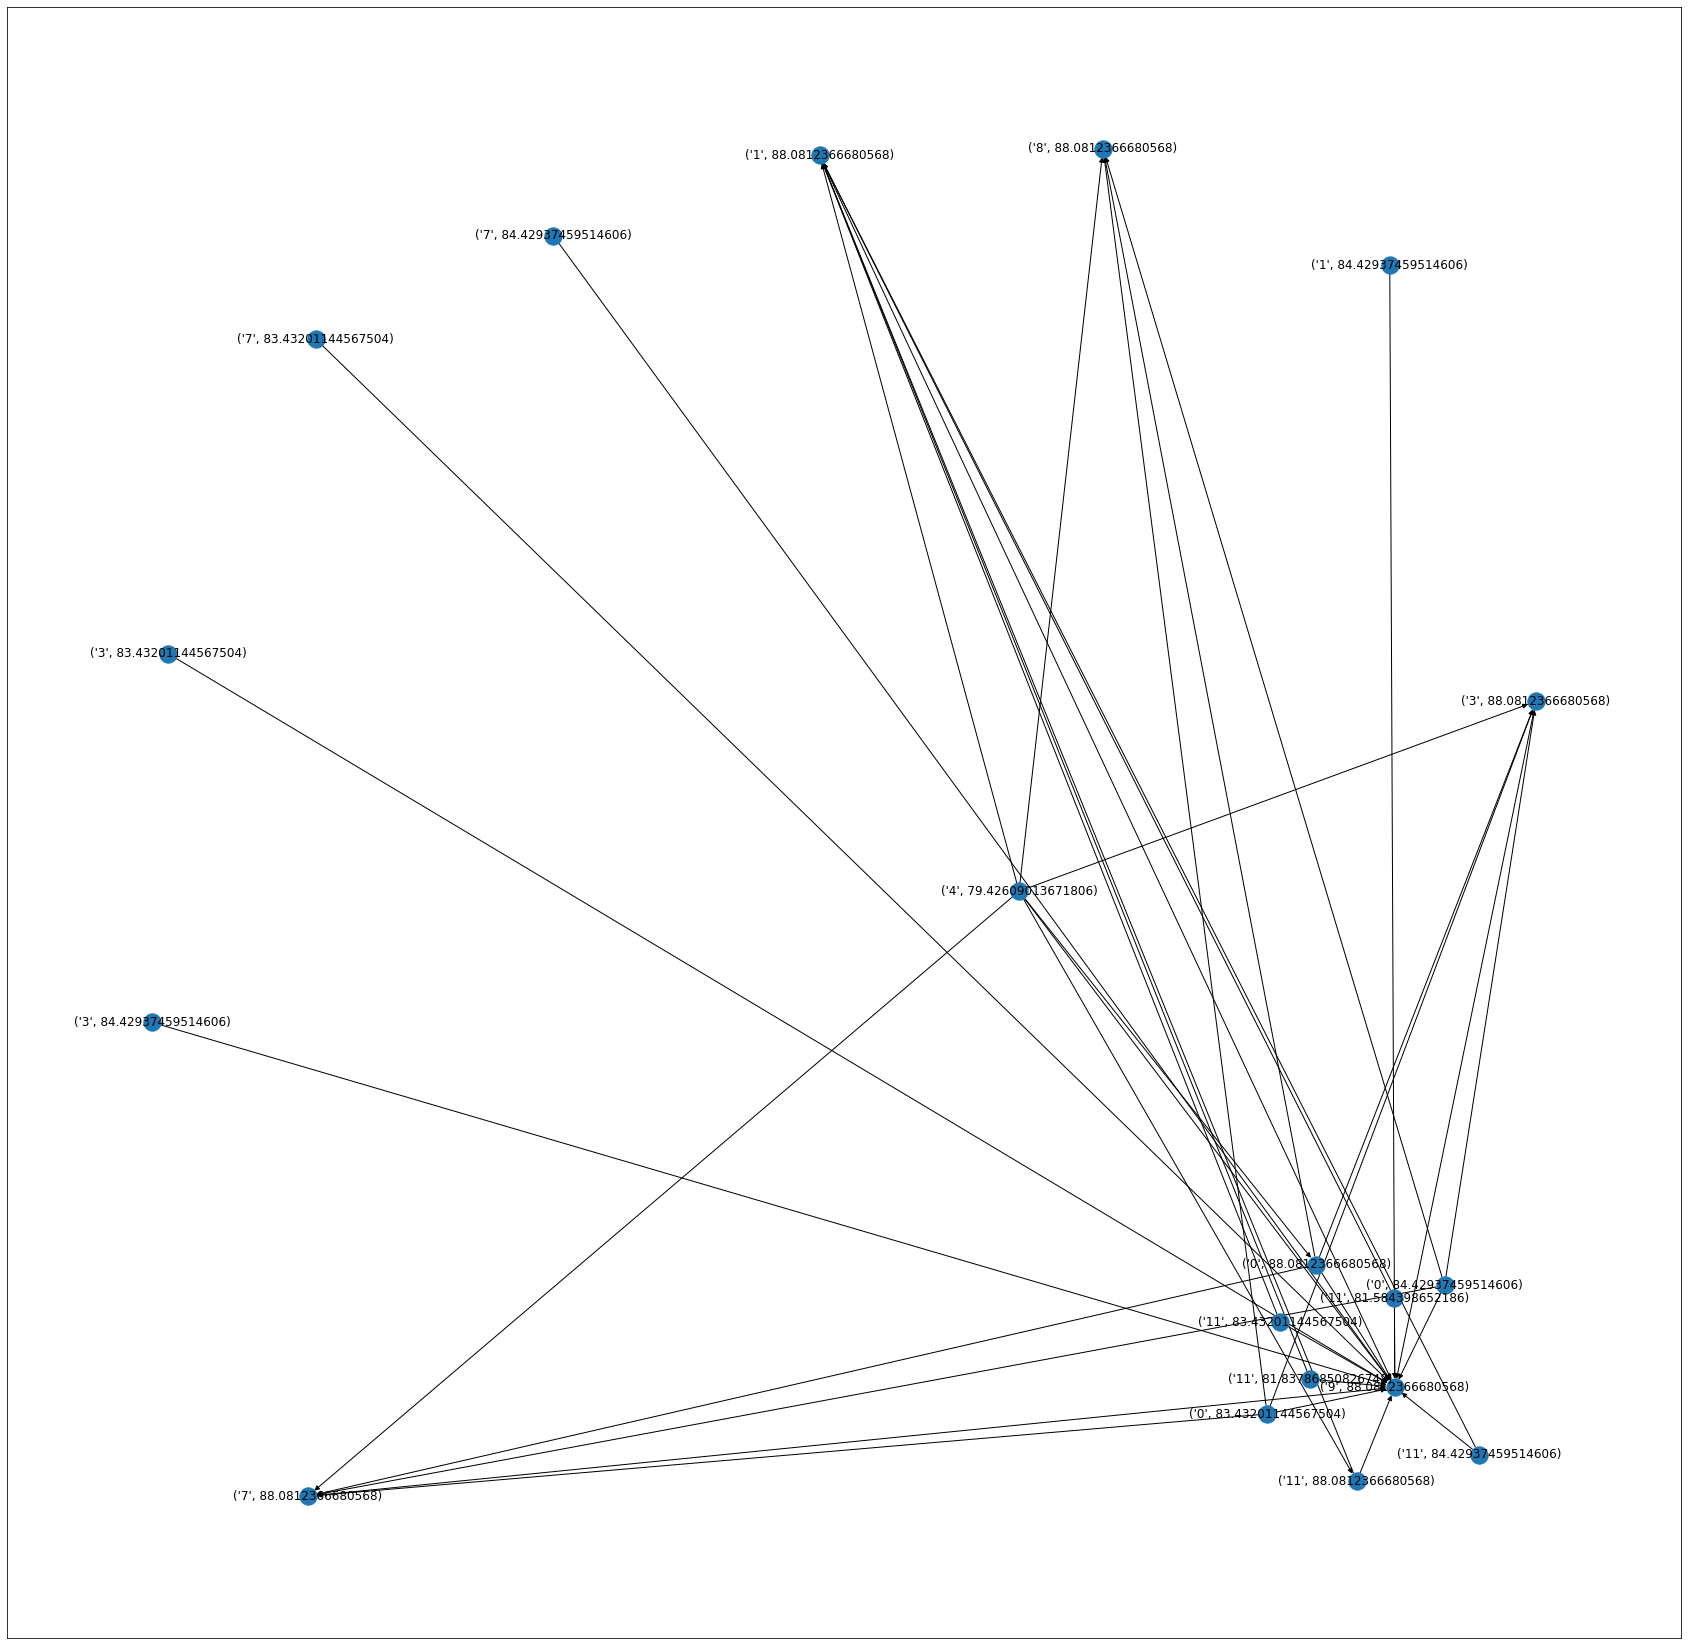

In [18]:
import networkx as nx
GD = GT[(84.42937459514606, 88.0812366680568)].graph
ren = dict()
for e in GD.nodes:
    ren[e] = (nouveau.node_to_label[e[0]],e[1])
#print(ren)
GN =  nx.relabel_nodes(GD, ren, copy=True)
fig, ax = plt.subplots(figsize=(30,30))
nx.draw_networkx(GN,arrows=True,width = 1,ax = ax)

In [19]:
import networkx as nx
paths = nx.all_simple_paths(GT[(84.42937459514606, 88.0812366680568)].graph, source=(0, 88.0812366680568), target = (9, 88.0812366680568))

In [20]:
for e in paths:
    print(e)

[(0, 88.0812366680568), (3, 88.0812366680568), (9, 88.0812366680568)]
[(0, 88.0812366680568), (7, 88.0812366680568), (9, 88.0812366680568)]
[(0, 88.0812366680568), (9, 88.0812366680568)]


In [21]:
GT[(84.42937459514606, 88.0812366680568)].graph[(0, 88.0812366680568)][(9, 88.0812366680568)]

{'weight': 1, 'nb_paths': 2}

In [22]:
GT[(84.42937459514606, 88.0812366680568)].graph[(4, 79.42609013671806)]

AtlasView({(0, 88.0812366680568): {'weight': 0, 'nb_paths': 1}, (11, 88.0812366680568): {'weight': 0, 'nb_paths': 1}, (9, 88.0812366680568): {'weight': 2, 'nb_paths': 2}, (7, 88.0812366680568): {'weight': 1, 'nb_paths': 1}, (1, 88.0812366680568): {'weight': 1, 'nb_paths': 1}, (3, 88.0812366680568): {'weight': 1, 'nb_paths': 1}, (8, 88.0812366680568): {'weight': 1, 'nb_paths': 1}})

In [23]:
"weight" in GT[(84.42937459514606, 88.0812366680568)].graph[(4, 79.42609013671806)][(0, 88.0812366680568)]

True

In [24]:
for e in G.graph[(5,75.61304700994472)]:
    print(e)

KeyError: (5, 75.61304700994472)

In [25]:
GG.l_nei[(5, 75.61304700994472)]

KeyError: (5, 75.61304700994472)

In [26]:
import networkx as nx
for e in G.sources():
    for path in nx.all_simple_paths(G.graph, source=e, target=(5,43.20861816893123)):
        print(path)

In [27]:
edge = bt.edges(nouveau)

In [28]:
before, after = bt.volume_instantenuous(nouveau, G, events, events_reverse, edge)
mx = bt.max_volume_superposition(GT)
print(mx)

5


In [29]:
for e in G.graph[(3,77.72417383674939)]:
    print(e)

KeyError: (3, 77.72417383674939)

In [30]:
G.graph[(3,77.72417383674939)][(1, 84.75277347981506)]

KeyError: (3, 77.72417383674939)

In [31]:
G.graph[(3,77.72417383674939)][(5, 84.75277347981506)]

KeyError: (3, 77.72417383674939)

In [32]:
after[4]

{2.359059416331988: False,
 13.455672503002031: False,
 18.579993255160478: False,
 19.878426137056497: False,
 21.31293018103355: False,
 22.278091723238155: False,
 22.52581331493392: False,
 24.02708578529516: False,
 24.1320941641333: False,
 24.192830891936: False,
 25.327848244670754: False,
 27.480982722876274: False,
 31.999687236753932: False,
 32.80437360133133: True,
 33.57149700068622: False,
 38.24357192361394: False,
 39.71262743583119: False,
 41.06847054468504: False,
 42.31388481515437: False,
 44.168890858398306: False,
 50.425124453022434: False,
 53.91499554493517: False,
 54.87746515065513: False,
 56.69104208674378: False,
 59.41127040764964: False,
 60.903666402994986: False,
 60.916407967138554: False,
 61.23866173149713: False,
 61.39093478686634: False,
 61.421135855314596: False,
 61.86949408259534: False,
 62.513125590706636: False,
 63.27663921740965: False,
 63.8994770662073: False,
 64.27905042707731: False,
 64.40748199012464: False,
 64.70053005485087: 

In [33]:
before[4]

{2.359059416331988: False,
 13.455672503002031: False,
 18.579993255160478: False,
 19.878426137056497: False,
 21.31293018103355: False,
 22.278091723238155: False,
 22.52581331493392: False,
 24.02708578529516: False,
 24.1320941641333: False,
 24.192830891936: False,
 25.327848244670754: False,
 27.480982722876274: False,
 31.999687236753932: False,
 32.80437360133133: False,
 33.57149700068622: True,
 38.24357192361394: False,
 39.71262743583119: False,
 41.06847054468504: False,
 42.31388481515437: False,
 44.168890858398306: False,
 50.425124453022434: False,
 53.91499554493517: False,
 54.87746515065513: False,
 56.69104208674378: False,
 59.41127040764964: False,
 60.903666402994986: False,
 60.916407967138554: False,
 61.23866173149713: False,
 61.39093478686634: False,
 61.421135855314596: False,
 61.86949408259534: False,
 62.513125590706636: False,
 63.27663921740965: False,
 63.8994770662073: False,
 64.27905042707731: False,
 64.40748199012464: False,
 64.70053005485087: 

In [34]:
sigma = bt.volume_metapaths_at_t(G, node, cur_best, mx)
f_edge = bt.dictionary_first_edge(G,  cur_best)
sigma_r = bt.optimal_with_resting_con(nouveau, node, f_edge, events, G, sigma, cur_best, unt)

In [35]:
sigma_r

{(0, 2.359059416331988): vol(0,0),
 (0, 13.455672503002031): vol(0,0),
 (0, 18.579993255160478): vol(0,0),
 (0, 19.878426137056497): vol(0,0),
 (0, 21.31293018103355): vol(0,0),
 (0, 22.278091723238155): vol(0,0),
 (0, 22.52581331493392): vol(0,0),
 (0, 24.02708578529516): vol(0,0),
 (0, 24.1320941641333): vol(0,0),
 (0, 24.192830891936): vol(0,0),
 (0, 25.327848244670754): vol(0,0),
 (0, 27.480982722876274): vol(0,0),
 (0, 31.999687236753932): vol(0,0),
 (0, 32.80437360133133): vol(0,0),
 (0, 33.57149700068622): vol(0,0),
 (0, 38.24357192361394): vol(0,0),
 (0, 39.71262743583119): vol(0,0),
 (0, 41.06847054468504): vol(0,0),
 (0, 42.31388481515437): vol(0,0),
 (0, 44.168890858398306): vol(0,0),
 (0, 50.425124453022434): vol(0,0),
 (0, 53.91499554493517): vol(0,0),
 (0, 54.87746515065513): vol(0,0),
 (0, 56.69104208674378): vol(0,0),
 (0, 59.41127040764964): vol(0,0),
 (0, 60.903666402994986): vol(0,0),
 (0, 60.916407967138554): vol(0,0),
 (0, 61.23866173149713): vol(0,0),
 (0, 61.3909

In [36]:
lat_triplet[5]

[[33.57149700068622, 61.421135855314596, 5],
 [79.42609013671806, 88.0812366680568, 5],
 [89.25308792404718, 89.25308792404718, 5],
 [89.32121451205022, 89.32121451205022, 5],
 [90.8182145981255, 90.8182145981255, 5],
 [94.45611643044136, 94.45611643044136, 4],
 [94.48906117961505, 94.48906117961505, 4],
 [95.37871915545995, 95.37871915545995, 5],
 [96.97103941556651, 96.97103941556651, 6]]

In [37]:
contri[5]

NameError: name 'contri' is not defined

In [38]:
sigma_r[(5, 75.61304700994472)]

KeyError: (5, 75.61304700994472)

In [39]:
GG.l_nei[(1, 79.96710253478658)]

KeyError: (1, 79.96710253478658)

In [40]:
contri, prev_next = bt.contribution_each_latency_con(nouveau, lat_rev_triplet,events[0],events[len(events)-1], before, after)
latence_arrival = {v : { y: [x,z] for (x,y,z) in lat_triplet[v] }  for v in nouveau.nodes }
latence_depar = {v : { x : [y,z] for (x,y,z) in lat_triplet[v] }  for v in nouveau.nodes }

In [41]:
prev_next[0:8]

[{},
 {},
 {32.80437360133133: [33.57149700068622,
   76.66468557090026,
   76.99328472475085,
   77.7317161272031,
   78.13441189433178,
   79.42609013671806,
   89.25308792404718,
   89.32121451205022,
   90.8182145981255,
   94.45611643044136,
   94.48906117961505,
   95.37871915545995,
   96.97103941556651],
  33.57149700068622: [32.80437360133133,
   76.66468557090026,
   76.99328472475085,
   77.7317161272031,
   78.13441189433178,
   79.42609013671806,
   89.25308792404718,
   89.32121451205022,
   90.8182145981255,
   94.45611643044136,
   94.48906117961505,
   95.37871915545995,
   96.97103941556651],
  76.66468557090026: [33.57149700068622,
   32.80437360133133,
   76.99328472475085,
   77.7317161272031,
   78.13441189433178,
   79.42609013671806,
   89.25308792404718,
   89.32121451205022,
   90.8182145981255,
   94.45611643044136,
   94.48906117961505,
   95.37871915545995,
   96.97103941556651],
  76.99328472475085: [76.66468557090026,
   33.57149700068622,
   32.804373601

In [42]:
contri[6]

{61.421135855314596: (2.359059416331988, 100.0)}

In [43]:
preced = bt.preced_node(S, G,events,events_reverse)

In [44]:
preced[2][65.90654777474518]

KeyError: 65.90654777474518

In [45]:
deltasvvt = bt.dictionary_svvt(G, node, latence_arrival, contri, prev_next, sigma_r,  latence_depar)

In [46]:
deltasvvt

{(1, 61.421135855314596): vol(687.0130805411117,0),
 (0, 61.421135855314596): vol(687.0130805411117,0),
 (0, 61.86949408259534): vol(0,0),
 (1, 61.86949408259534): vol(0,0),
 (0, 62.513125590706636): vol(0,0),
 (1, 62.513125590706636): vol(0,0),
 (10, 64.40748199012464): vol(0,0),
 (0, 64.40748199012464): vol(0,0),
 (0, 64.70053005485087): vol(0,0),
 (10, 64.70053005485087): vol(0,0),
 (0, 64.8967631130064): vol(0,0),
 (10, 64.8967631130064): vol(0,0),
 (0, 67.92667403302652): vol(0,0),
 (10, 67.92667403302652): vol(0,0),
 (0, 68.88539079083769): vol(0,0),
 (10, 68.88539079083769): vol(0,0),
 (4, 79.42609013671806): vol(0,0),
 (0, 83.43201144567504): vol(448.61307978442204,0),
 (0, 84.42937459514606): vol(0,0),
 (0, 88.0812366680568): vol(0,0),
 (0, 88.42947958329005): vol(0,0),
 (4, 89.25308792404718): vol(0,0),
 (0, 89.25308792404718): vol(0,0),
 (4, 89.32121451205022): vol(0,0),
 (0, 89.32121451205022): vol(0,0),
 (4, 90.8182145981255): vol(0,0),
 (0, 90.8182145981255): vol(0,0),
 (

In [47]:
contribution = bt.general_contribution_from_node(nouveau, G, node, GG, sigma_r, deltasvvt, events, events_reverse, pre, GT, unt, preced)

v,t 4 79.42609013671806 l_nei[(v,t)] [[81.584398652186, [11]], [81.83786850826748, [11]], [83.43201144567504, [0, 11]], [84.42937459514606, [0, 11]], [88.0812366680568, [0, 11]], [88.42947958329005, [0, 11]]]
w,t_p 0 88.42947958329005
case cont
yp,tpp 0 88.42947958329005
s vol(0,0) contribution[yp][tpp] vol(0,0) (kappa(r,tpp,ev_prev)*sigma_r[(v,t)]/sigma_r[(yp,tpp)] ) vol(0.0696838690400213,0) r 0 coef vol(0,0)
yp,tpp 3 88.42947958329005
s vol(0,0) contribution[yp][tpp] vol(0,0) (kappa(r,tpp,ev_prev)*sigma_r[(v,t)]/sigma_r[(yp,tpp)] ) vol(0.00485584160438684,0) r 1 coef vol(0,0)
yp,tpp 7 88.42947958329005
s vol(0,0) contribution[yp][tpp] vol(0,0) (kappa(r,tpp,ev_prev)*sigma_r[(v,t)]/sigma_r[(yp,tpp)] ) vol(0.00485584160438684,0) r 1 coef vol(0,0)
yp,tpp 8 88.42947958329005
s vol(0,0) contribution[yp][tpp] vol(0,0) (kappa(r,tpp,ev_prev)*sigma_r[(v,t)]/sigma_r[(yp,tpp)] ) vol(0.00485584160438684,0) r 1 coef vol(0,0)
yp,tpp 5 88.42947958329005
s vol(0,0) contribution[yp][tpp] vol(0,0) (ka

In [48]:
contribution

{5: {100.0: vol(0,0),
  98.4474030268212: vol(0,0),
  96.97103941556651: vol(0,0),
  95.37871915545995: vol(0,0),
  94.48906117961505: vol(0,0),
  94.45611643044136: vol(0,0),
  90.8182145981255: vol(0,0),
  89.32121451205022: vol(0,0),
  89.25308792404718: vol(0,0),
  88.42947958329005: vol(0,0),
  88.0812366680568: vol(90.3110967451333,0),
  63.8994770662073: vol(0,0),
  63.27663921740965: vol(0,0),
  62.513125590706636: vol(0,0),
  61.86949408259534: vol(0,0),
  61.421135855314596: vol(832.1267326103077,0),
  2.359059416331988: vol(0,0),
  13.455672503002031: vol(0,0),
  18.579993255160478: vol(0,0),
  19.878426137056497: vol(0,0),
  21.31293018103355: vol(0,0),
  22.278091723238155: vol(0,0),
  22.52581331493392: vol(0,0),
  24.02708578529516: vol(0,0),
  24.1320941641333: vol(0,0),
  24.192830891936: vol(0,0),
  25.327848244670754: vol(0,0),
  27.480982722876274: vol(0,0),
  31.999687236753932: vol(0,0),
  32.80437360133133: vol(0,0),
  33.57149700068622: vol(0,0),
  38.2435719236

In [49]:
contribution[4]

{100.0: vol(0,0),
 98.4474030268212: vol(0,0),
 96.97103941556651: vol(0,0),
 95.37871915545995: vol(0,0),
 94.48906117961505: vol(0,0),
 94.45611643044136: vol(0,0),
 90.8182145981255: vol(0,0),
 89.32121451205022: vol(0,0),
 89.25308792404718: vol(0,0),
 88.42947958329005: vol(0,0),
 88.0812366680568: vol(0,0),
 84.42937459514606: vol(36.29824043931349,0),
 83.43201144567504: vol(3591.857549205538,0),
 81.83786850826748: vol(3607.70277623804,0),
 81.584398652186: vol(3961.866805006257,0),
 79.42609013671806: vol(3961.866805006257,0),
 78.13441189433178: vol(0,0),
 77.7317161272031: vol(0,0),
 76.99328472475085: vol(0,0),
 76.66468557090026: vol(0,0),
 38.24357192361394: vol(0,0),
 33.57149700068622: vol(7062.442828432262,0),
 32.80437360133133: vol(0,0),
 2.359059416331988: vol(0,0),
 13.455672503002031: vol(0,0),
 18.579993255160478: vol(0,0),
 19.878426137056497: vol(0,0),
 21.31293018103355: vol(0,0),
 22.278091723238155: vol(0,0),
 22.52581331493392: vol(0,0),
 24.02708578529516:

In [50]:
(4, 81.584398652186) in G.nodes()

False

In [51]:
G.graph[(5, 75.61304700994472)][(2, 80.41206683462686)]

KeyError: (5, 75.61304700994472)

In [52]:
for e in G.sources():
    print(e)

(2, 32.80437360133133)
(2, 33.57149700068622)
(2, 76.66468557090026)
(2, 76.99328472475085)
(2, 77.7317161272031)
(2, 78.13441189433178)
(2, 79.42609013671806)
(2, 89.25308792404718)
(2, 89.32121451205022)
(2, 90.8182145981255)
(2, 94.45611643044136)
(2, 94.48906117961505)
(2, 95.37871915545995)
(2, 96.97103941556651)


In [53]:
for path in nx.all_simple_paths(G.graph, source=(10, 48.774350390362976,), target=(9, 72.01646440110846)):
    print(path)

NodeNotFound: source node (10, 48.774350390362976) not in graph

In [57]:
import networkx as nx
for e in G.sources():
    for path in nx.all_simple_paths(G.graph, source=e, target=(9, 72.01646440110846)):
        print(path)

[(10, 48.774350390362976), (3, 48.774350390362976), (2, 50.027053296920634), (1, 50.027053296920634), (9, 72.01646440110846)]
[(10, 48.774350390362976), (3, 48.774350390362976), (2, 50.027053296920634), (1, 51.66511360390297), (9, 72.01646440110846)]
[(10, 48.774350390362976), (3, 48.774350390362976), (2, 50.027053296920634), (1, 52.19631019627161), (9, 72.01646440110846)]
[(10, 48.774350390362976), (3, 48.774350390362976), (2, 50.027053296920634), (1, 52.209253426500624), (9, 72.01646440110846)]
[(10, 48.774350390362976), (3, 48.774350390362976), (2, 50.027053296920634), (1, 52.36657582858103), (9, 72.01646440110846)]
[(10, 48.774350390362976), (3, 48.774350390362976), (2, 50.027053296920634), (1, 52.37920458587425), (9, 72.01646440110846)]
[(10, 48.774350390362976), (3, 48.774350390362976), (2, 50.027053296920634), (1, 53.243200997307675), (9, 72.01646440110846)]
[(10, 48.774350390362976), (3, 48.774350390362976), (2, 50.027053296920634), (1, 55.21438025221634), (9, 72.01646440110846

In [44]:
import networkx as nx
for e in G.sources():
    for path in nx.all_simple_paths(G.graph, source=e, target=(2, 79.73349567329026)):
        print(path)

In [45]:
deltasvvt[(2, 80.41206683462686)]

KeyError: (2, 80.41206683462686)

In [46]:
sigma_r[(2, 80.41206683462686)]

KeyError: (2, 80.41206683462686)

In [47]:
sigma_r[ (2, 79.73349567329026)]

KeyError: (2, 79.73349567329026)

In [48]:
lat_triplet[13]

[[29.980542920690997, 29.980542920690997, 1],
 [32.35564951059685, 32.35564951059685, 1],
 [33.39858298908548, 33.39858298908548, 1],
 [33.68420217251255, 33.68420217251255, 1],
 [34.56852623145108, 34.56852623145108, 1],
 [34.94880940007197, 34.94880940007197, 1],
 [35.845168080990085, 35.845168080990085, 1],
 [36.69718008266238, 36.69718008266238, 1],
 [37.801204380587215, 37.801204380587215, 1],
 [38.00115310843021, 38.00115310843021, 1],
 [38.385932498830876, 38.385932498830876, 1],
 [38.57045306057162, 38.57045306057162, 1],
 [39.36287579217078, 39.36287579217078, 1],
 [43.2548163868659, 43.2548163868659, 1],
 [43.458078188108644, 43.458078188108644, 1],
 [46.76583040552515, 46.76583040552515, 1],
 [46.81232535871056, 46.81232535871056, 1],
 [46.90412030964997, 46.90412030964997, 1],
 [47.654375402102914, 47.654375402102914, 1],
 [48.570092408137825, 48.570092408137825, 1],
 [48.774350390362976, 48.774350390362976, 1],
 [95.92131140433415, 95.92131140433415, 1],
 [96.5175603794948

In [49]:
prev_next[13]

{}

In [50]:
contri[13]

{29.980542920690997: (2.0109770323050946, 29.980542920690997),
 32.35564951059685: (32.35564951059685, 32.35564951059685),
 33.39858298908548: (33.39858298908548, 33.39858298908548),
 33.68420217251255: (33.68420217251255, 33.68420217251255),
 34.56852623145108: (34.56852623145108, 34.56852623145108),
 34.94880940007197: (34.94880940007197, 34.94880940007197),
 35.845168080990085: (35.845168080990085, 35.845168080990085),
 36.69718008266238: (36.69718008266238, 36.69718008266238),
 37.801204380587215: (37.801204380587215, 37.801204380587215),
 38.00115310843021: (38.00115310843021, 38.00115310843021),
 38.385932498830876: (38.385932498830876, 38.385932498830876),
 38.57045306057162: (38.57045306057162, 38.57045306057162),
 39.36287579217078: (39.36287579217078, 39.36287579217078),
 43.2548163868659: (43.2548163868659, 43.2548163868659),
 43.458078188108644: (43.458078188108644, 43.458078188108644),
 46.76583040552515: (46.76583040552515, 46.76583040552515),
 46.81232535871056: (46.8123

In [51]:
deltasvvt[(13,91.51014453612402)]

KeyError: (13, 91.51014453612402)

In [52]:
after[13]

{2.0109770323050946: False,
 12.9414970933256: False,
 13.399624034629847: False,
 19.004395331202318: False,
 20.02590006283754: False,
 20.358456906870508: False,
 23.983439152747145: False,
 25.97957964784327: False,
 27.562930013367748: False,
 29.25305897228746: False,
 29.980542920690997: True,
 32.35564951059685: True,
 33.39858298908548: True,
 33.68420217251255: True,
 34.56852623145108: True,
 34.94880940007197: True,
 35.845168080990085: True,
 36.69718008266238: True,
 37.801204380587215: True,
 38.00115310843021: True,
 38.385932498830876: True,
 38.57045306057162: True,
 39.36287579217078: True,
 43.2548163868659: True,
 43.458078188108644: True,
 46.76583040552515: True,
 46.81232535871056: True,
 46.90412030964997: True,
 47.654375402102914: True,
 48.570092408137825: True,
 48.774350390362976: False,
 49.825544608944845: False,
 50.027053296920634: False,
 51.66511360390297: False,
 52.19631019627161: False,
 52.209253426500624: False,
 52.36657582858103: False,
 52.37

In [53]:
import networkx as nx
for e in G.sources():
    for path in nx.all_simple_paths(G.graph, source=e, target=(13, 91.51014453612402)):
        print(path)

In [54]:
import networkx as nx
for e in G.sources():
    for path in nx.all_simple_paths(G.graph, source=e, target=(13, 91.51014453612402)):
        print("nouveau")
        for i in range(0,len(path)-1):
            print(G.graph[path[i]][path[i+1]]["interval"])
            

In [55]:
import networkx as nx
for e in G.sources():
    for path in nx.all_simple_paths(G.graph, source=e, target=(13, 92.21183319084625)):
        print(path)

In [56]:
import networkx as nx
for e in G.sources():
    for path in nx.all_simple_paths(G.graph, source=e, target=(13, 92.21183319084625)):
        print("nouveau")
        for i in range(0,len(path)-1):
            print(G.graph[path[i]][path[i+1]]["interval"])
            